# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
(summary_ob_f07, context_ob_f07, model_ob_f07, metric_ob_f07) = pickle.load(open( '19-02-01_results_over_baseline_faces_07.p', "rb"))
(summary_ob_f05, context_ob_f05, model_ob_f05, metric_ob_f05) = pickle.load(open( '19-02-01_results_over_baseline_faces_05.p', "rb"))
(summary_ob_f03, context_ob_f03, model_ob_f03, metric_ob_f03) = pickle.load(open( '19-02-01_results_over_baseline_faces_03.p', "rb"))

## Get AUC scores

In [8]:
auc_table = summary[:,:,3]
auc_f03_table = summary_f03[:,:,3]
auc_f05_table = summary_f05[:,:,3]
auc_f07_table = summary_f07[:,:,3]

## Change scores into DataFrames

In [9]:
AUC = pd.DataFrame(data=auc_table, columns=model, index=context)
AUC.columns.name='models'
AUC.index.name='context'

AUC = AUC.transpose()
AUC

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.698040,0.707347,0.682952,0.681585,0.683133,0.729921
cas,0.692052,0.703851,0.672925,0.667086,0.670638,0.728063
covsal,0.746774,0.754006,0.735052,0.733442,0.726257,0.767142
gbvs,0.749465,0.758711,0.734478,0.734344,0.728549,0.783232
icf,0.701568,0.711141,0.686049,0.679900,0.682979,0.717650
ik,0.663008,0.673263,0.646383,0.656406,0.652015,0.688133
sun,0.603264,0.599431,0.609479,0.560426,0.589477,0.595790
dg,0.760010,0.773875,0.737536,0.749271,0.738996,0.784495
faces,0.979706,0.968213,0.998336,0.994076,0.968691,0.985565


In [10]:
faces = AUC.loc['faces']
AUC = AUC.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg']]

In [11]:
AUC_f03 = pd.DataFrame(data=auc_f03_table, columns=model_f03, index=context_f03)
AUC_f03.columns.name='models'
AUC_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
AUC_f03 = AUC_f03.rename(index=str, columns=col).transpose()

AUC_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.701392,0.713620,0.681570,0.681863,0.689665,0.730011
cas,0.695769,0.710621,0.671564,0.668491,0.676538,0.729025
covsal,0.750548,0.760145,0.734990,0.735682,0.732640,0.768929
gbvs,0.752009,0.763010,0.734177,0.735972,0.732871,0.784090
icf,0.703955,0.715215,0.685701,0.680453,0.686559,0.719037
ik,0.668251,0.682089,0.645819,0.658155,0.661111,0.690817
sun,0.611347,0.613150,0.608425,0.562480,0.601873,0.599777


In [12]:
AUC_f05 = pd.DataFrame(data=auc_f05_table, columns=model_f05, index=context_f05)
AUC_f05.columns.name='models'
AUC_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
AUC_f05 = AUC_f05.rename(index=str, columns=col).transpose()

AUC_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.702716,0.715734,0.681613,0.682210,0.692044,0.730439
cas,0.697598,0.713322,0.672109,0.668932,0.680393,0.729163
covsal,0.751736,0.762012,0.735077,0.736452,0.734824,0.769649
gbvs,0.752898,0.764442,0.734184,0.736536,0.734617,0.784087
icf,0.704762,0.716543,0.685663,0.680618,0.687945,0.719901
ik,0.669794,0.684588,0.645813,0.658868,0.664084,0.691309
sun,0.613976,0.617384,0.608452,0.563758,0.605716,0.601674


In [13]:
AUC_f07 = pd.DataFrame(data=auc_f07_table, columns=model_f07, index=context_f07)
AUC_f07.columns.name='models'
AUC_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
AUC_f07 = AUC_f07.rename(index=str, columns=col).transpose()

AUC_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.703589,0.717085,0.681711,0.682661,0.693656,0.731142
cas,0.698546,0.714773,0.672241,0.669232,0.682526,0.729582
covsal,0.753049,0.763897,0.735464,0.737088,0.737128,0.770830
gbvs,0.753201,0.764895,0.734245,0.736809,0.735714,0.784198
icf,0.705782,0.718012,0.685956,0.681121,0.690002,0.721120
ik,0.670892,0.686282,0.645943,0.659359,0.666581,0.692061
sun,0.615479,0.619786,0.608496,0.564438,0.608479,0.602998


## Vizualization

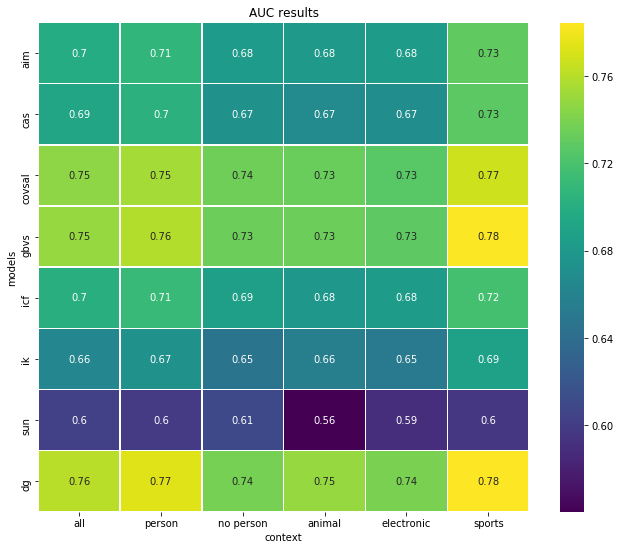

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('AUC results');
plt.savefig('plots/AUC_all.jpg', bbox_inches='tight', pad_inches=0)

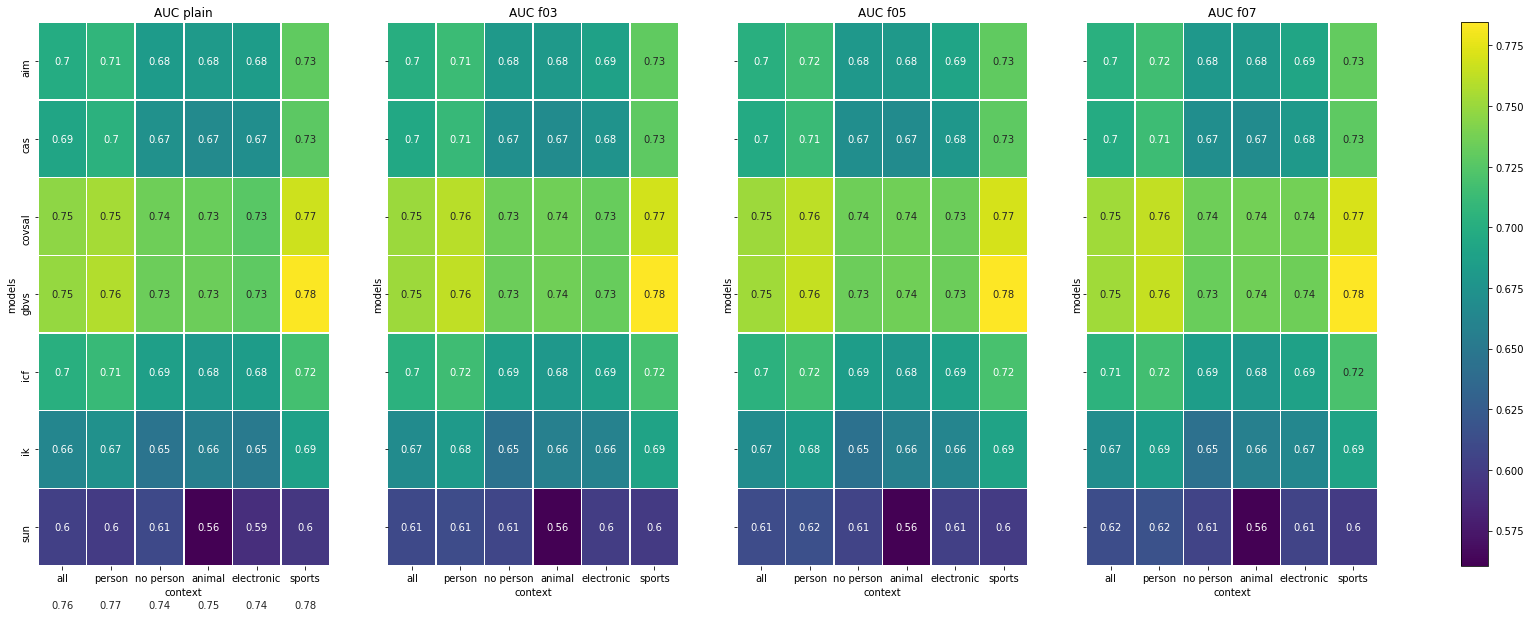

In [25]:
fig, ax = plt.subplots(1, 4,figsize=(30, 10), sharex=True, sharey=True)

im = sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(AUC_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(AUC_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
sns.heatmap(AUC_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('AUC plain');
ax[1].set_title('AUC f03');
ax[2].set_title('AUC f05');
ax[3].set_title('AUC f07');
plt.savefig('plots/AUC_sep.jpg', bbox_inches='tight', pad_inches=0)

### Relative Error

In [16]:
AUC0 = AUC.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

In [17]:
AUC_diff_f03 = ((AUC_f03 - AUC0) / AUC0)*100
AUC_diff_f05 = ((AUC_f05 - AUC0) / AUC0)*100
AUC_diff_f07 = ((AUC_f07 - AUC0) / AUC0)*100

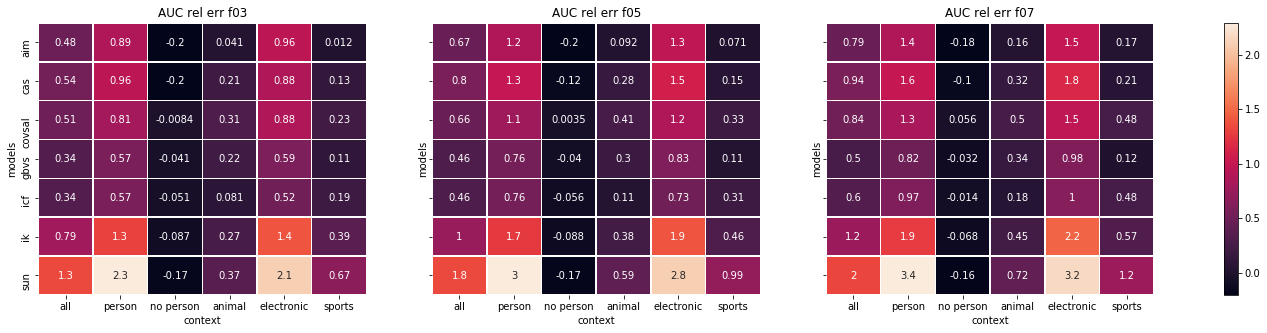

In [18]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(AUC_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(AUC_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(AUC_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('AUC rel err f03');
ax[1].set_title('AUC rel err f05');
ax[2].set_title('AUC rel err f07');
plt.savefig('plots/AUC_sep_diff.jpg', bbox_inches='tight', pad_inches=0)

### "Zoom in"

In [19]:
aim_auc_f03 = AUC_diff_f03.transpose()['aim']
aim_auc_f05 = AUC_diff_f05.transpose()['aim']
aim_auc_f07 = AUC_diff_f07.transpose()['aim']

In [20]:
df = pd.DataFrame([aim_auc_f03, aim_auc_f05, aim_auc_f07], index=[3,5,7])
df = df.transpose()

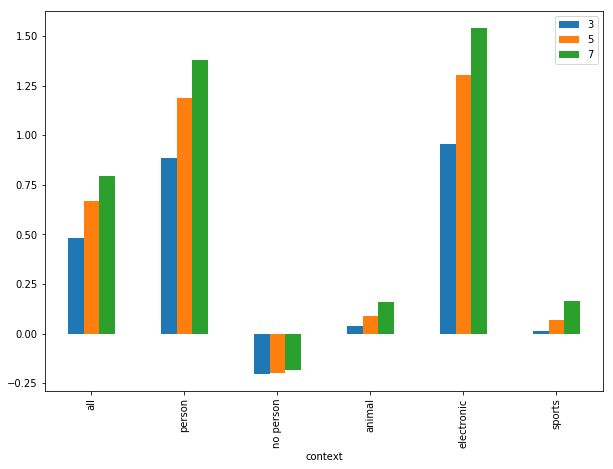

In [24]:
fig, ax = plt.subplots(figsize=(10, 7));
df.plot.bar(ax=ax);
plt.savefig('plots/auc_aim_relerr_all.jpg', bbox_inches='tight', pad_inches=0)

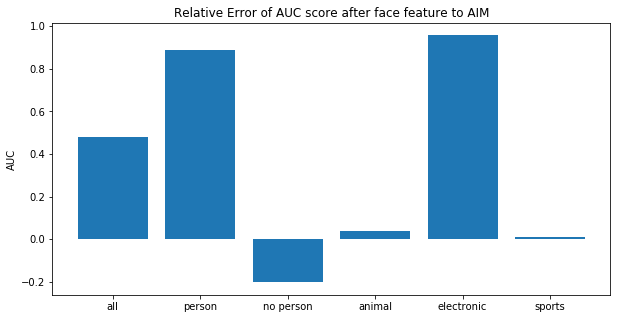

In [23]:
plt.subplots(1,1,figsize=(10,5))
plt.bar(aim_auc_f03.index, aim_auc_f03.values);
plt.title('Relative Error of AUC score after face feature to AIM');
plt.ylabel('AUC')
plt.savefig('plots/auc_aim_relerr.jpg', bbox_inches='tight', pad_inches=0)

### "Zoom in"

In [26]:
gbvs_auc_f03 = AUC_diff_f03.transpose()['gbvs']
gbvs_auc_f05 = AUC_diff_f05.transpose()['gbvs']
gbvs_auc_f07 = AUC_diff_f07.transpose()['gbvs']

In [27]:
df_gbvs = pd.DataFrame([gbvs_auc_f03, gbvs_auc_f05, gbvs_auc_f07], index=[3,5,7])
df_gbvs = df_gbvs.transpose()

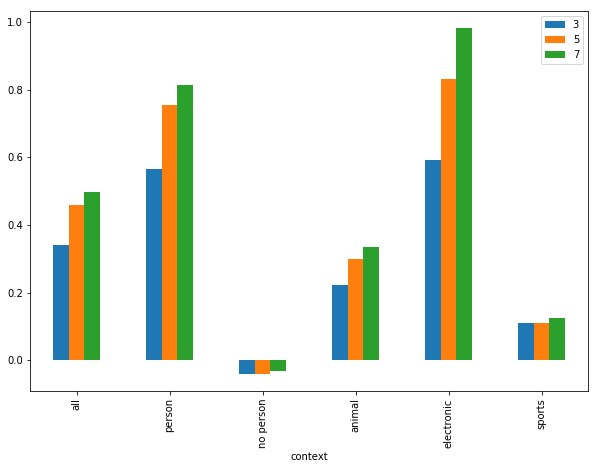

In [28]:
fig, ax = plt.subplots(figsize=(10, 7));
df_gbvs.plot.bar(ax=ax);
plt.savefig('plots/auc_gbvs_relerr_all.jpg', bbox_inches='tight', pad_inches=0)

### Comparison between deepgaze and the best GBVS

In [29]:
gbvs_f07 = AUC_f07.transpose()['gbvs']
gbvs = AUC.transpose()['gbvs']

In [30]:
dg = AUC.transpose()['dg']
dg

context
all           0.760010
person        0.773875
no person     0.737536
animal        0.749271
electronic    0.738996
sports        0.784495
Name: dg, dtype: float64

In [31]:
df_comp = pd.DataFrame([gbvs, gbvs_f07,dg], index=['gbvs', 'gbvs_f07', 'dg'])
df_comp = df_comp.transpose()

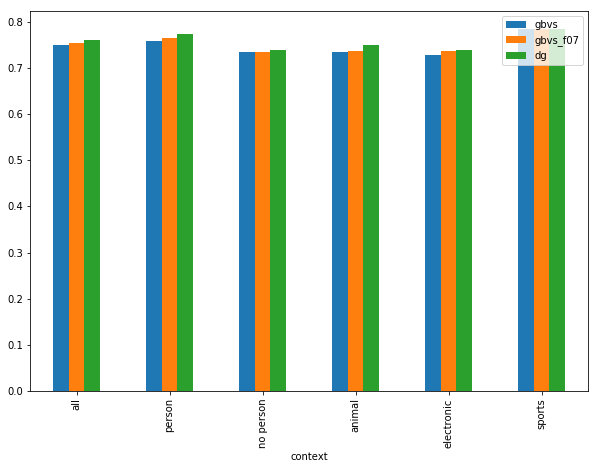

In [32]:
fig, ax = plt.subplots(figsize=(10, 7));
df_comp.plot.bar(ax=ax);
plt.savefig('plots/auc_gbvs_vs_dg.jpg', bbox_inches='tight', pad_inches=0)

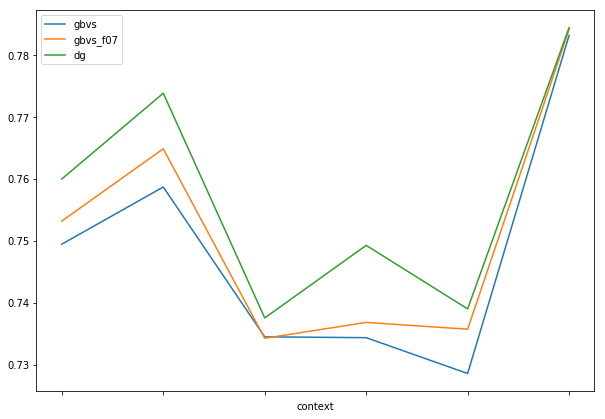

In [33]:
fig, ax = plt.subplots(figsize=(10, 7));
df_comp.plot(ax=ax);